In [4]:
#importing libraries
#last updated 10/10/2020
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from email.parser import Parser
import os,csv
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
#importing dataset
data =pd.read_csv('./dataset/enron_dataset_20%.csv')

In [38]:
#dropping features in the dataset which are a result of calculation
data = data.drop(columns=['Cat_1_level_1', 'Cat_1_level_2',
       'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight',
       'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1',
       'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2',
       'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight',
       'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1',
       'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2',
       'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2',
       'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight'])

In [39]:
data.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,labeled
0,403470,<117238.1075846810566.JavaMail.evans@thyme>,2000-12-11 09:22:00,frozenset({'susan.scott@enron.com'}),frozenset({'alicia.perkins@enron.com'}),Re: Travel,Susan M Scott,Alicia Perkins,katyhester@hotmail.com,NaN,\Susan_Scott_Dec2000_June2001_2\Notes Folders\...,SCOTT-S,sscott5.nsf,"Hey Alicia, Katy's email address is katyhester...",scott-s,False
1,130904,<12689165.1075853747639.JavaMail.evans@thyme>,2000-03-09 10:00:00,frozenset({'scott.goodell@enron.com'}),frozenset({'chris.germany@enron.com'}),Re: k#65403,Scott Goodell,Chris Germany,NaN,NaN,\Chris_Germany_Dec2000\Notes Folders\Discussio...,Germany-C,cgerman.nsf,65534 is 149349 in Sitara 65403 was 149346 as ...,germany-c,False
2,217372,<12058190.1075856802090.JavaMail.evans@thyme>,2000-02-04 18:14:00,frozenset({'vince.kaminski@enron.com'}),frozenset({'vkaminski@aol.com'}),El Paso / ENA Deal Completely Terminated Now,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_7\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,kaminski-v,False
3,376779,<1251997.1075857131869.JavaMail.evans@thyme>,2000-11-01 12:34:00,frozenset({'benjamin.rogers@enron.com'}),frozenset({'patty.donahue@chase.com'}),Re: FW: winnie_t,Benjamin Rogers,"""Donahue, Patty"" <Patty.Donahue@Chase.com> @ E...",NaN,NaN,\Benjamin_Rogers_Dec2000_1\Notes Folders\All d...,Rogers-B,brogers.nsf,What are you doing sending me this crap! I wan...,rogers-b,False
4,63707,<23661622.1075843051592.JavaMail.evans@thyme>,2000-11-29 15:43:00,frozenset({'jeff.dasovich@enron.com'}),frozenset({'joseph.alamo@enron.com'}),Re: Address Information,Jeff Dasovich,Joseph Alamo,NaN,NaN,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,Can you get this kind person the info? Thanks ...,dasovich-j,False


In [40]:
data.tail()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,labeled
103475,398509,<9956220.1075860573758.JavaMail.evans@thyme>,1999-09-09 17:51:00,frozenset({'richard.sanders@enron.com'}),frozenset({'ferazzi@emrecruiting.com'}),Re: Candidate,Richard B Sanders,ferazzi@emrecruiting.com,NaN,NaN,\Richard_Sanders_Dec2000\Notes Folders\Sent,Sanders-R,rsander.nsf,Yes. Send his resume.,sanders-r,False
103476,438197,<26817012.1075844236728.JavaMail.evans@thyme>,2001-05-03 13:34:00,frozenset({'sarah.novosel@enron.com'}),"frozenset({'james.steffes@enron.com', 'richard...",Memo Regarding Washington Office,Sarah Novosel,"Richard Shapiro, James D Steffes",Linda Robertson,NaN,\Richard_Shapiro_June2001\Notes Folders\Discus...,SHAPIRO-R,rshapiro.nsf,Rick and Jim: As Linda and I discussed with Ri...,shapiro-r,False
103477,302430,<14477836.1075846120303.JavaMail.evans@thyme>,2000-08-21 17:33:00,frozenset({'kay.mann@enron.com'}),frozenset({'martin.penkwitz@enron.com'}),Re: Westinghouse,Kay Mann,Martin W Penkwitz,NaN,NaN,\Kay_Mann_June2001_4\Notes Folders\'sent mail,MANN-K,kmann.nsf,FYI. ---------------------- Forwarded by Kay M...,mann-k,False
103478,296344,<22030900.1075858287215.JavaMail.evans@thyme>,2001-01-17 18:11:00,frozenset({'phillip.love@enron.com'}),frozenset({'victor.guggenheim@enron.com'}),Pages to print for Hunter,Phillip M Love,Victor Guggenheim,NaN,NaN,\Phillip_Love_Jun2001\Notes Folders\Sent,Love-P,plove.nsf,---------------------- Forwarded by Phillip M ...,love-p,False
103479,147417,<26905586.1075840593794.JavaMail.evans@thyme>,2001-04-13 10:43:00,frozenset({'pete.davis@enron.com'}),frozenset({'pete.davis@enron.com'}),Start Date: 4/13/01; HourAhead hour: 11; <COD...,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\mark guzman 6-28-02\Notes Folders\All documents,GUZMAN-M,mark guzman 6-28-02.nsf,Start Date: 4/13/01; HourAhead hour: 11; No an...,guzman-m,False


In [41]:
data.describe()

,Unnamed: 0
count,103480.000000
mean,258428.879928
std,149261.811705
min,6.000000
25%,129517.250000
50%,258514.500000
75%,387474.250000
max,517400.000000


In [42]:
data.columns.values

array(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin',
       'X-FileName', 'content', 'user', 'labeled'], dtype=object)

In [43]:
data.dtypes

Unnamed: 0     int64
Message-ID    object
Date          object
From          object
To            object
Subject       object
X-From        object
X-To          object
X-cc          object
X-bcc         object
X-Folder      object
X-Origin      object
X-FileName    object
content       object
user          object
labeled         bool
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103480 entries, 0 to 103479
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  103480 non-null  int64 
 1   Message-ID  103480 non-null  object
 2   Date        103480 non-null  object
 3   From        103480 non-null  object
 4   To          99165 non-null   object
 5   Subject     99656 non-null   object
 6   X-From      103476 non-null  object
 7   X-To        101679 non-null  object
 8   X-cc        25663 non-null   object
 9   X-bcc       39 non-null      object
 10  X-Folder    103476 non-null  object
 11  X-Origin    103476 non-null  object
 12  X-FileName  102624 non-null  object
 13  content     103246 non-null  object
 14  user        103480 non-null  object
 15  labeled     103480 non-null  bool  
dtypes: bool(1), int64(1), object(14)
memory usage: 11.9+ MB


In [45]:
#------------------End of Preprocessing---------------------------#

In [46]:
#Visualisation begins here.
#describe your visualisations here:
#WordCloud - Identifies most used words in the the subject and the content. 
#Bar Graph - It clearly shows that how biased our data is and due to its biasness the model in the future may give us many FALSE NEGATIVE 
# value hence we need to under sample the data or apply another strategy to tackle the issue.

(-0.5, 399.5, 199.5, -0.5)

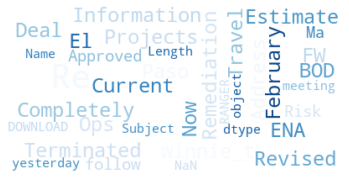

In [47]:
#The Subject head 100
#plt.subplot(2, 2, 1)
wordcloud = WordCloud(background_color="white", scale=1,colormap='Blues', max_font_size=40).generate(str(data['Subject'].head(100)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

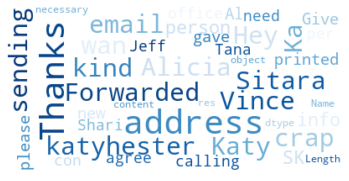

In [48]:
#The Content head 1000
#plt.subplot(2, 2, 2)
wordcloud = WordCloud(background_color="white", scale=1,colormap='Blues', max_font_size=40).generate(str(data['content'].head(1000)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')

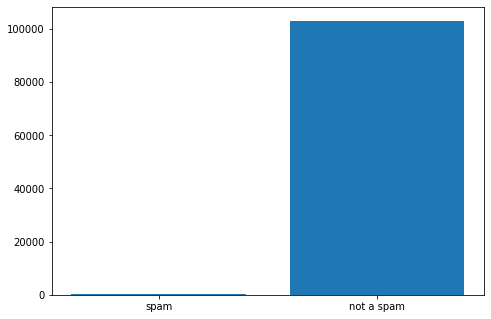

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['spam', 'not a spam']
countTrue=0;
countFalse=0;
tp=0
for i in data['labeled']:
    tp = tp + 1;
    if i == True:
        countTrue +=1;
    elif i == False:
        countFalse +=1;
students = [countTrue, countFalse]
ax.bar(langs,students)
plt.show()

In [68]:
## Analyzing emails to and from Andrew Fastow, CFO of enron corporation.

In [52]:
emails_from_andrew = pd.read_csv('./dataset/andrew_sent.csv')
pd.DataFrame.reset_index(emails_from_andrew)
emails_from_andrew.set_index('To', inplace=True)
emails_from_andrew

,From,Content
To,,
greg.whalley@enron.com,andrew.fastow@enron.com,\r\n\r\n -----original message-----\r\nfrom: \...
jeff.skilling@enron.com,andrew.fastow@enron.com,"jeff:\r\n\r\ni'm sure this is just a ""misunder..."
greg.whalley@enron.com,andrew.fastow@enron.com,\r\n\r\n -----original message-----\r\nfrom: \...


In [53]:
maximum_interaction_sent = []
for row in emails_from_andrew.iterrows():
    maximum_interaction_sent.append(row[0])
maximum_interaction_sent = tuple(maximum_interaction_sent)
counts_sent_to = Counter(maximum_interaction_sent)
print(counts_sent_to.most_common(5))

[('greg.whalley@enron.com', 2), ('jeff.skilling@enron.com', 1)]


In [54]:
emails_to_andrew = pd.read_csv('./dataset/andrew_recieved.csv')
pd.DataFrame.reset_index(emails_to_andrew)
emails_to_andrew.set_index('From', inplace=True)
emails_to_andrew

,To,Content
From,,
rebecca.carter@enron.com,"rick.buy@enron.com, andrew.fastow@enron.com",please provide comments to the attached minute...
joannie.williamson@enron.com,"raymond.bowen@enron.com, london.brown@enron.co...",management committee meeting\r\ndate:\t\tmonda...
paula.rieker@enron.com,"raymond.bowen@enron.com, london.brown@enron.co...",the management committee is invited to join th...
joannie.williamson@enron.com,"k..allen@enron.com, sally.beck@enron.com, tim....",i apologize if there has been any confusion re...
paula.rieker@enron.com,"rick.buy@enron.com, richard.causey@enron.com, ...",ken lay is very interested in providing opport...
...,...,...
bryan.seyfried@enron.com,"greg.whalley@enron.com, kenneth.lay@enron.com,...",john thought you might be interested in the fo...
paula.rieker@enron.com,"mark.koenig@enron.com, greg.whalley@enron.com,...",the location for today's meeting at 4:15 p.m. ...
paula.rieker@enron.com,"mark.koenig@enron.com, greg.whalley@enron.com,...",pls. join a meeting in greg's office today at ...


In [55]:
maximum_interaction_recieved = []
for row in emails_to_andrew.iterrows():
    maximum_interaction_recieved.append(row[0])
maximum_interaction_recieved = tuple(maximum_interaction_recieved)
counts_got_from = Counter(maximum_interaction_recieved)
print(counts_got_from.most_common(10))

[('joannie.williamson@enron.com', 28), ('paula.rieker@enron.com', 12), ('mike.mcconnell@enron.com', 10), ('maureen.mcvicker@enron.com', 8), ('karen.myer@enron.com', 7), ('rosalee.fleming@enron.com', 5), ('gay.mayeux@enron.com', 5), ('rebecca.carter@enron.com', 4), ('l..wells@enron.com', 4), ('billy.dorsey@enron.com', 4)]


In [56]:
emails_from_andrew = pd.read_csv('./dataset/andrew_sent.csv')
pd.DataFrame.reset_index(emails_from_andrew)
emails_from_andrew.set_index('Content', inplace=True)
#emails_from_andrew

In [57]:
content_of_emails_from_Andrew = []
for row in emails_from_andrew.iterrows():
    content_of_emails_from_Andrew.append(row[0])
#content_of_emails_from_Andrew[0]

In [58]:
content_of_emails_from_Andrew_full = " "
content_of_emails_from_Andrew_full = content_of_emails_from_Andrew_full.join(content_of_emails_from_Andrew)

In [64]:
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
emails_data = nltk.word_tokenize(content_of_emails_from_Andrew_full)         #tokenizing content
#emails_data_words = [nltk.word_tokenize(sent) for sent in content_of_emails_from_Andrew_full]
#emails_data = " "
#emails_data = ','.join(str(email_con) for email_con in emails_data_words)
words_only = [l.lower() for l in emails_data if l not in string_punctuation if l not in ignoreChar] #removing unwanted words
filtered_emails_data=[word for word in words_only if word not in stopwords.words('english')] #removing stopwords
wnl = nltk.WordNetLemmatizer()                                         #lemmatizing words
counts=Counter([wnl.lemmatize(data) for data in filtered_emails_data]) #recording the count of words
commn_words=[] 
freq=[]

In [67]:
print()
print("The number of emails sent to Andrew Fastow is "+str(len(emails_to_andrew))+".")
print("The number of emails Andrew Fastow sent is "+str(len(emails_from_andrew))+".")
print()
for a in counts.most_common(10):                                   #printing most words
    commn_words.append(a[0])
    freq.append(a[1])
    print(a)


The number of emails sent to Andrew Fastow is 159.
The number of emails Andrew Fastow sent is 3.

('petrobras', 26)
('transaction', 16)
('--', 15)
('asep', 12)
('meeting', 11)
('november', 10)
('approval', 8)
('letter', 8)
('vagner', 8)
('victor', 8)


Most talked about words in these emails are "PETROBRAS", "transaction", "meeting", "MONDAY", "November".
According to the research it was found out that the Enron Corp. and Petrobras, Brazil's big, government-owned oil and gas business, have formed a partnership in the month of November on a Monday.

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('enron_email_20_percent.csv')

In [5]:
#Checking type and validity of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103480 entries, 0 to 103479
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103480 non-null  int64  
 1   Message-ID      103480 non-null  object 
 2   Date            103480 non-null  object 
 3   From            103480 non-null  object 
 4   To              99165 non-null   object 
 5   Subject         99656 non-null   object 
 6   X-From          103476 non-null  object 
 7   X-To            101679 non-null  object 
 8   X-cc            25663 non-null   object 
 9   X-bcc           39 non-null      object 
 10  X-Folder        103476 non-null  object 
 11  X-Origin        103476 non-null  object 
 12  X-FileName      102624 non-null  object 
 13  content         103246 non-null  object 
 14  user            103480 non-null  object 
 15  Cat_1_level_1   327 non-null     float64
 16  Cat_1_level_2   327 non-null     float64
 17  Cat_1_weig

In [6]:
#date and time intact
data['Date']

0         2000-12-11 09:22:00
1         2000-03-09 10:00:00
2         2000-02-04 18:14:00
3         2000-11-01 12:34:00
4         2000-11-29 15:43:00
                 ...         
103475    1999-09-09 17:51:00
103476    2001-05-03 13:34:00
103477    2000-08-21 17:33:00
103478    2001-01-17 18:11:00
103479    2001-04-13 10:43:00
Name: Date, Length: 103480, dtype: object

In [7]:
data.describe()

,Unnamed: 0,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,...,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight
count,103480.000000,327.0,327.000000,327.000000,289.000000,289.000000,289.000000,232.000000,232.000000,232.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,258428.879928,1.0,2.581040,1.651376,2.003460,3.069204,1.591696,2.327586,3.982759,1.538793,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,149261.811705,0.0,1.916671,0.496172,0.530319,3.196469,0.513093,0.585183,3.618095,0.524924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,129517.250000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,258514.500000,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,387474.250000,1.0,4.000000,2.000000,2.000000,4.000000,2.000000,3.000000,6.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,517400.000000,1.0,8.000000,3.000000,4.000000,13.000000,3.000000,4.000000,13.000000,4.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Creating DataFrame according to my requirement
df = pd.DataFrame(data, columns=['Subject','From','To','Date'])

In [9]:
print(df)

                                                  Subject  \
0                                              Re: Travel   
1                                             Re: k#65403   
2            El Paso / ENA Deal Completely Terminated Now   
3                                        Re: FW: winnie_t   
4                                 Re: Address Information   
...                                                   ...   
103475                                      Re: Candidate   
103476                   Memo Regarding Washington Office   
103477                                   Re: Westinghouse   
103478                          Pages to print for Hunter   
103479  Start Date: 4/13/01; HourAhead hour: 11;  <COD...   

                                            From  \
0           frozenset({'susan.scott@enron.com'})   
1         frozenset({'scott.goodell@enron.com'})   
2        frozenset({'vince.kaminski@enron.com'})   
3       frozenset({'benjamin.rogers@enron.com'})   
4      

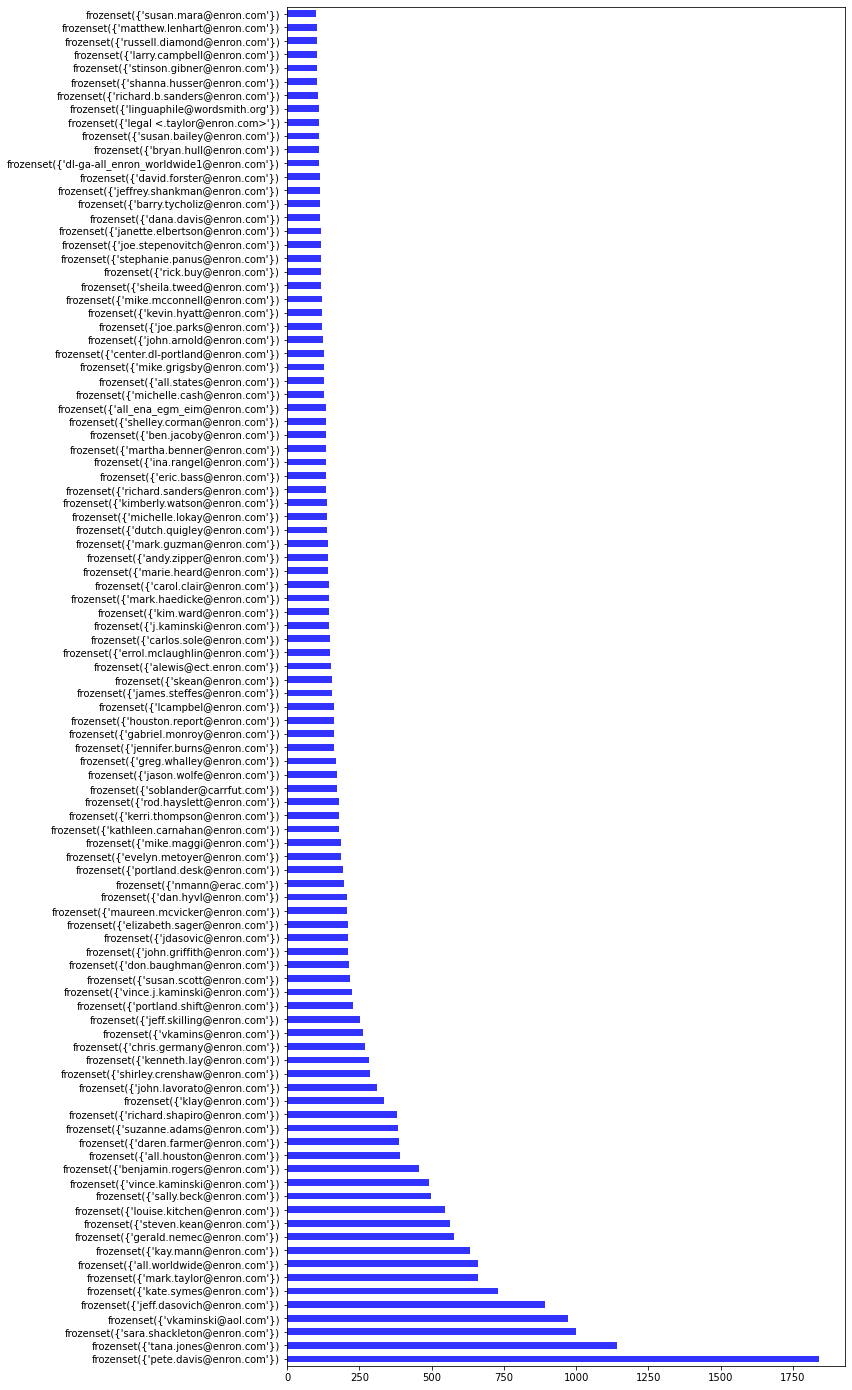

In [10]:
#Importing Matplot library to plot a chart showing employees who recieved maximum number of emails
#Later, I've shown the frequency of employees who sent and received maximum suspicious emails
import matplotlib.pyplot as plt
df['To'].value_counts().head(100).plot(kind='barh', figsize=(10,25), color='blue', alpha=0.8)

In [11]:
#Result clearly shows who all recieved maximum emails
#Now, I've manually sorted the whole dataset in Excel and listed down all the instances wherein all forms of the substring "Confidential" is used. 
#This enabled me to manipulate the dataframe and plot number of suspicious emails sent by employees of Enron
#Making different frames for each such instance

d1=df.loc[df['Subject'] == 'CONFIDENTIAL']
d2=df.loc[df['Subject'] == 'Confidential']
d3=df.loc[df['Subject'] == 'Confidential Information and Securities Trading']
d4=df.loc[df['Subject'] == 'Re: Confidential information']
d5=df.loc[df['Subject'] == 'NatSource LLC Confidentiality Agreement']
d6=df.loc[df['Subject'] == 'Re: Confidential - Don Black']
d7=df.loc[df['Subject'] == 'Re: List of EnronOnline Confidentiality Agreements']
d8=df.loc[df['Subject'] == 'Fw: CONFIDENTIAL AND PRIVILEGED ATTORNEY-CLIENT COMMUNICATION']
d9=df.loc[df['Subject'] == 'TW Gas Sales: PRIVILEGED AND CONFIDENTIAL ATTORNEY CLIENT PRIVILEGE']
d10=df.loc[df['Subject'] == 'RE: DWR Stranded Cost Update--CONFIDENTIAL']
d11=df.loc[df['Subject'] == 'List of EnronOnline Confidentiality Agreements']
d12=df.loc[df['Subject'] == 'Attached is an updated list of the Confidentiality Agreements.']
d13=df.loc[df['Subject'] == 'Confidential Folder to safely pass information to Arthur Andersen']
d14=df.loc[df['Subject'] == 'Request for Confidential Information by the GAO']
d15=df.loc[df['Subject'] == 'Confidentiality Agreement']
d16=df.loc[df['Subject'] == 'HIGHLY CONFIDENTIAL']
d17=df.loc[df['Subject'] == 'CONFIDENTIALITY AGREEMENT']
d18=df.loc[df['Subject'] == 'Re: Confidentiality Agreements']
d19=df.loc[df['Subject'] == 'Re: Confidential Employee Information/Lenhart']
d20=df.loc[df['Subject'] == 'Confidential Inquiry']
d21=df.loc[df['Subject'] == 'Re: Confidential - Notes from Portland Visit']
d22=df.loc[df['Subject'] == 'RE: confidentiality agreement']
d23=df.loc[df['Subject'] == 'CONFIDENTIAL - CA Customer Letter']
d24=df.loc[df['Subject'] == 'Re: Confidential --CFTC Chair']
d25=df.loc[df['Subject'] == 'URGENT AND CONFIDENTIAL']
d26=df.loc[df['Subject'] == 'RE: Privileged & confidential']
d27=df.loc[df['Subject'] == 'Re: FW: Confidentiality Agreement Annual Report [Agreement]']
d28=df.loc[df['Subject'] == 'CONFIDENTIAL: Attorney/Client Priveledge -- PX Data workbooks']
d29=df.loc[df['Subject'] == 'Re: Confidential']
d30=df.loc[df['Subject'] == 'Re: Private and Confidential']
d31=df.loc[df['Subject'] == 'Revlon? Hmmm...cute. How do you feel about trading mascera? -----Original Message----- From: Matthew.Lenhart@enron.com Sent: Friday, October 26, 2001 8:25 AM To: Hal.Lenhart@apollogrp.edu Subject: RE: sorry i had to run last night. so the word is now that enron has about 4 or 5 companies looking to take us over. aol, lucent, revlon?, and a few others. i will give you a call later. -----Original Message----- From: Hal Lenhart Sent: Wednesday, October 24, 2001 10:05 AM To: Lenhart, Matthew Subject: RE: It looks that way. Maybe I should sell to spark a rally. Hope things are going well otherwise. Talk to you soon. -----Original Message----- From: Lenhart, Matthew Sent: Wednesday, October 24, 2001 8:41 AM To: hfl@fp.edu Subject: enron is going to be a penny stock pretty soon. sec is investigating now. This e-mail is the property of Enron Corp. and/or its relevant affiliate and may contain confidential and privileged material for the sole use of the intended recipient (s). Any review, use, distribution or disclosure by others is strictly prohibited. If you are not the intended recipient (or authorized to receive for the recipient), please contact the sender or reply to Enron Corp. at and delete all copies of the message. This e-mail (and any attachments hereto) are not intended to be an offer (or an acceptance) and do not create or evidence a binding and enforceable contract between Enron Corp. (or any of its affiliates) and the intended recipient or any other party, and may not be relied on by anyone as the basis of a contract by estoppel or otherwise. Thank you.']

In [12]:
# Example :
print(d24)

                             Subject                                  From  \
7042   Re: Confidential --CFTC Chair  frozenset({'steven.kean@enron.com'})   
26424  Re: Confidential --CFTC Chair         frozenset({'wgramm@aol.com'})   
50341  Re: Confidential --CFTC Chair  frozenset({'steven.kean@enron.com'})   
66648  Re: Confidential --CFTC Chair         frozenset({'wgramm@aol.com'})   

                                             To                 Date  
7042   frozenset({'linda.robertson@enron.com'})  2001-02-14 14:28:00  
26424    frozenset({'steven.j.kean@enron.com'})  2001-02-14 08:58:00  
50341  frozenset({'linda.robertson@enron.com'})  2001-02-14 14:28:00  
66648    frozenset({'steven.j.kean@enron.com'})  2001-02-14 08:58:00  


In [13]:
#Assign all instances to a tuple 'frames'
frames = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30, d31]

In [14]:
#Concatenating the individual frames into one 'result'
result = pd.concat(frames)

In [15]:
print(result)

                            Subject                                     From  \
24160                  CONFIDENTIAL  frozenset({'david.delainey@enron.com'})   
27792                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
30331                  CONFIDENTIAL    frozenset({'diana.peters@enron.com'})   
75038                  CONFIDENTIAL    frozenset({'robert.bruce@enron.com'})   
97048                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
...                             ...                                      ...   
55490              Re: Confidential   frozenset({'mark.haedicke@enron.com'})   
71356              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
86632              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
88123              Re: Confidential     frozenset({'kay.chapman@enron.com'})   
19361  Re: Private and Confidential   frozenset({'chris.dorland@enron.com'})   

                                       

In [16]:
#Converting resultant dictionary into DataFrame for convenience & naming it as 'df'
df=pd.DataFrame.from_dict(result)

In [17]:
print(df)

                            Subject                                     From  \
24160                  CONFIDENTIAL  frozenset({'david.delainey@enron.com'})   
27792                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
30331                  CONFIDENTIAL    frozenset({'diana.peters@enron.com'})   
75038                  CONFIDENTIAL    frozenset({'robert.bruce@enron.com'})   
97048                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
...                             ...                                      ...   
55490              Re: Confidential   frozenset({'mark.haedicke@enron.com'})   
71356              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
86632              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
88123              Re: Confidential     frozenset({'kay.chapman@enron.com'})   
19361  Re: Private and Confidential   frozenset({'chris.dorland@enron.com'})   

                                       

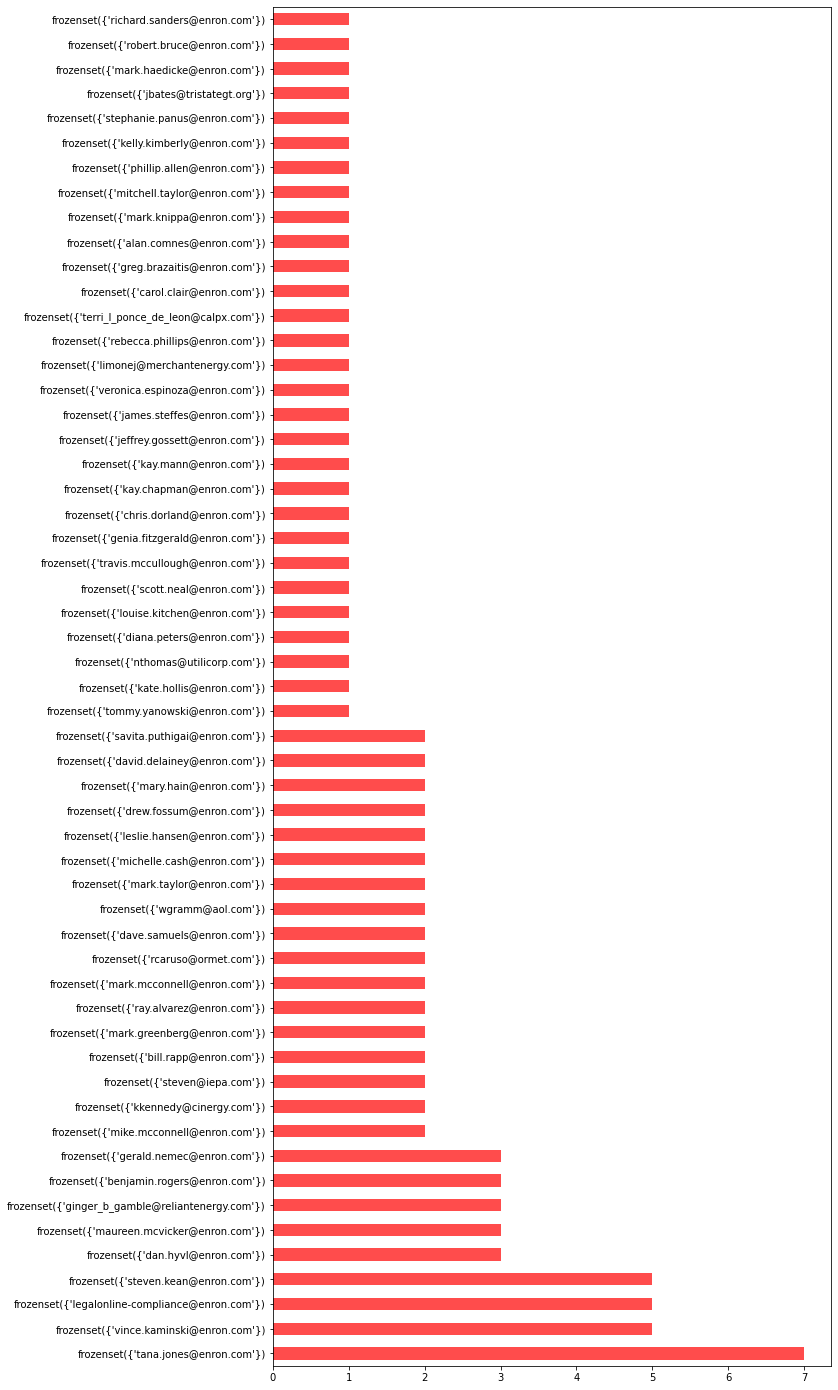

In [18]:
#As you can see, I've successfully received 100 such entries(But with repetitions of suspicious mails from some people)
#Now, Plotting a chart for frequency of suspicious emails sent by the same employee :

import matplotlib.pyplot as plt
df['From'].value_counts().head(100).plot(kind='barh', figsize=(10,25), color='red', alpha=0.7)

In [19]:
#Display Data that we have, but according to further requirement only
df[['Date', 'Subject']]

,Date,Subject
24160,2000-12-19 09:06:00,CONFIDENTIAL
27792,2001-06-26 19:46:00,CONFIDENTIAL
30331,2001-10-23 18:26:48,CONFIDENTIAL
75038,2001-04-30 11:28:00,CONFIDENTIAL
97048,2001-06-26 19:46:00,CONFIDENTIAL
...,...,...
55490,1999-07-19 11:49:00,Re: Confidential
71356,2000-10-18 15:09:00,Re: Confidential
86632,2000-08-30 17:43:00,Re: Confidential
88123,2000-11-13 13:31:00,Re: Confidential


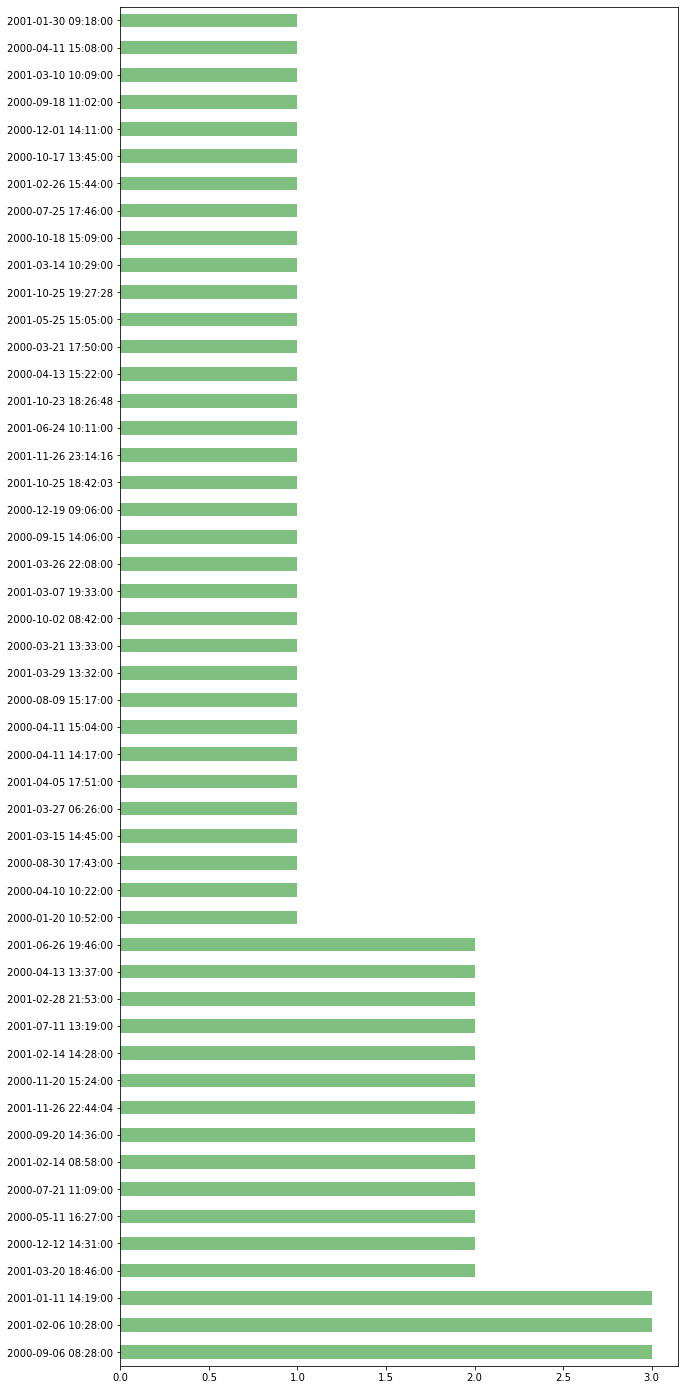

In [20]:
#Now I'm going to plot the frequency of suspicious emails sent and received on particualar Dates(First 50/100 entries taken) 
#This shows when malicious behaviour among the employees might be at it's peak

df['Date'].value_counts().head(50).plot(kind='barh', figsize=(10,25), color='green', alpha=0.5)